In [1]:
%run ~/relmapping/annot/notebooks/__init__.ipynb

/mnt/home3/jj374/anaconda36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


os.getcwd(): /mnt/beegfs/scratch_copy/ahringer/jj374/lab/relmapping


In [2]:
fp_TFBS = 'annot/Fig2S1_overlaps/modERN_modENCODE/modERN_modENCODE_ext200_merge.bed'
fp_Daugherty2017 = 'annot/Fig2S1_overlaps/Daugherty2017/Daugherty2017_consensus_ATAC.bed'
fp_Ho2017 = 'annot/Fig2S1_overlaps/Ho2017/Ho2017_DNase_emb.bed'

df_TFBS = pd.read_csv(fp_TFBS, sep='\t', names=yp.NAMES_BED9[:4])
df_Daugherty2017 = pd.read_csv(fp_Daugherty2017, sep='\t', comment='#', names=yp.NAMES_BED9)[yp.NAMES_BED3]
df_Ho2017 = pd.read_csv(fp_Ho2017, sep='\t', names=yp.NAMES_BED3)

/mnt/home3/jj374/anaconda36/lib/python3.6/site-packages/ipykernel_launcher.py:64: RuntimeWarning: Mean of empty slice


13054 of 42245 sites with CV values via promoter annotation
26764 of 42245 sites with CV values via "associated gene"


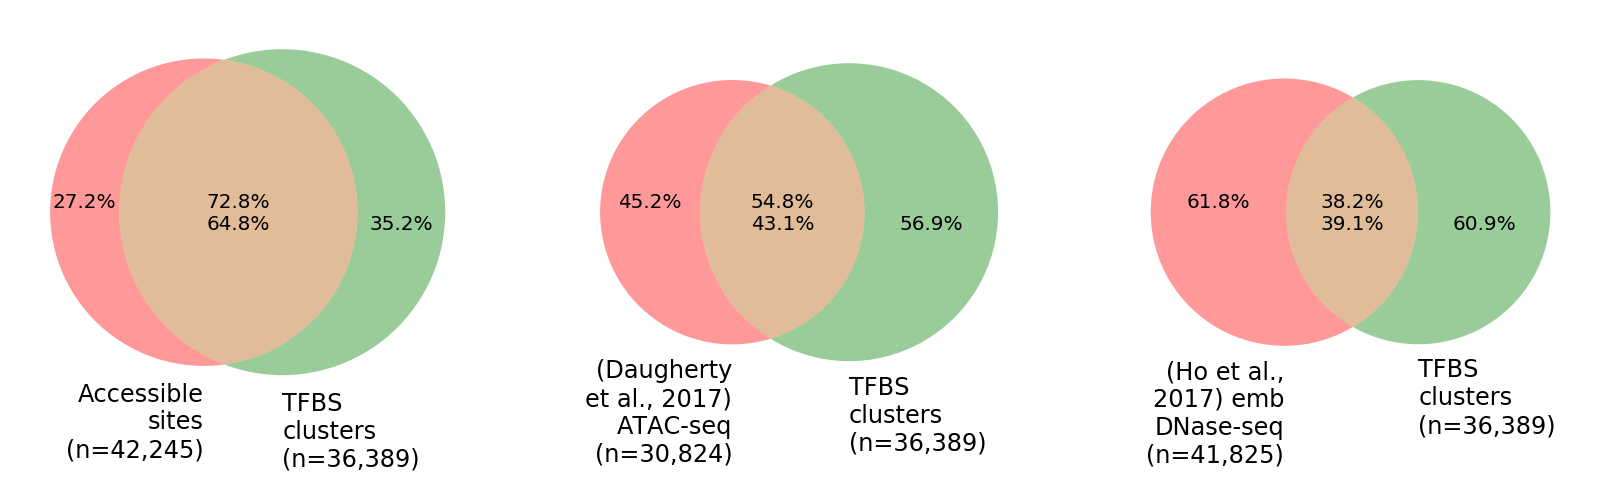

In [3]:
gv_regl = yp.GenomicVenn2(
    BedTool.from_dataframe(regl_Apr27()[yp.NAMES_BED3]),
    BedTool.from_dataframe(df_TFBS),
    label_a='Accessible\nsites',
    label_b='TFBS\nclusters',
)

gv_Daugherty2017 = yp.GenomicVenn2(
    BedTool.from_dataframe(df_Daugherty2017),
    BedTool.from_dataframe(df_TFBS),
    label_a='(Daugherty\net al., 2017)\nATAC-seq',
    label_b='TFBS\nclusters',
)

gv_Ho2017 = yp.GenomicVenn2(
    BedTool.from_dataframe(df_Ho2017),
    BedTool.from_dataframe(df_TFBS),
    label_a='(Ho et al.,\n2017) emb\nDNase-seq',
    label_b='TFBS\nclusters',
)

fig = plt.figure(figsize=(14, 4))#.subplots_adjust(wspace=0.5)
#plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
#plt.tight_layout(pad=100.0)#, h_pad=10.0)
plt.subplot(1,3,1)
gv_regl.plot(style='compact')

plt.subplot(1,3,2)
gv_Daugherty2017.plot(style='compact')

plt.subplot(1,3,3)
gv_Ho2017.plot(style='compact')

plt.savefig('annot_Apr27/Fig2S1A_compareto_TFBS.pdf', bbox_inches='tight', transparent=True)